Basic parameters : 
Multiple_electrode width 6um 
Silicon Base height 100um 
Drift electric field 1000V/cm 

In [434]:
import numpy as np 
import numpy 
import scipy as sp 
import scipy
from matplotlib import pyplot as plt 
import ast
import os 

In [435]:
variable="anode_radius"
y_variable="Multiply"

In [436]:
# This object is to draw the basic information from the txt log file . 
class information():
    def __init__(self,path):
        with open(path,"r") as f:
            self.raw=f.readlines()
            self.dic=ast.literal_eval(self.raw[0])
            
    def single_find(self,i:int, target:str):
        return float(self.raw[i][self.raw[i].find(target):].strip().split(" ")[0].split(":")[1])
    
    def single_dic_find(self,target:str):
        try :
            return self.dic[target]
        except :
            print("Failed to find the key")
            return "" 
    
    def field_find(self,target:str):
        result=[]
        for i in range(1,len(self.raw)):
            result.append(self.single_find(i,target))
        return result 
    
    def parameter_find(self,target:str):
        result=self.single_dic_find(target)
        return result 
    
    def parameter_float_find(self,target:str):
        result=float(self.single_dic_find(target).split("[")[0])
        return result

In [437]:
# List all the txt file within this folder 
file_list=[i for i in os.listdir(".") if i[-4:]==".txt"]

## Multiply_Error

In [438]:
# extract the basic information from the txt file 
voltage=[]
multiply_down_std=[]
multiply_up_std=[]
multiply_aver=[]
median_array=[]
# We log the average, median, up_standard_error, down_standard_error and variable(voltage)

# We check each file 
for i in file_list : 
    new= information(i)
    
    # find the multiply data
    multiply= np.array(new.field_find("Multiply")).astype(float)
    
    within_check = np.array(new.field_find("Multiply")).astype(float)
    multiply= multiply[np.where(within_check>0)[0]]
    
    #print(len(multiply))  
    #add the results to the array
    voltage.append(new.parameter_float_find("{}".format(variable)))
    multiply_aver.append(np.mean(multiply))
    multiply_down_std.append( np.sqrt( np.mean( (multiply[np.where(multiply<np.mean(multiply))[0]]-np.mean(multiply))**2 )))
    multiply_up_std.append( np.sqrt( np.mean( (multiply[np.where(multiply>np.mean(multiply))[0]]-np.mean(multiply))**2 )))
    median_array.append( np.median(multiply))
    
# sort the basic parameters according to the variable
order_numpy=np.argsort(voltage)
multiply_down_std=np.array(multiply_down_std)[order_numpy]
multiply_up_std=np.array(multiply_up_std)[order_numpy]
multiply_aver=np.array(multiply_aver)[order_numpy]
voltage=np.array(voltage)[order_numpy]
median_array=np.array(median_array)[order_numpy]
file_list=list(np.array(file_list)[order_numpy])

In [439]:
print(voltage)
print("\n")
print(multiply_down_std)
print("\n")
print(multiply_up_std)
print("\n")
print(multiply_aver)
print("\n")
print(file_list)

[ 9.9 10.1]


[12.84894232 13.43723847]


[23.03289442 21.58926964]


[81.892      80.54888889]


['information1674624212.42165.txt', 'information1674623619.1165972.txt']


[ 9.9 10.1]


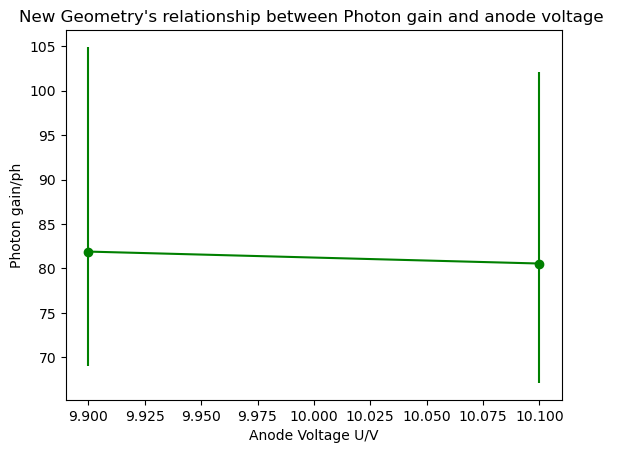

In [440]:
print(voltage)
arr=np.where(voltage<18500)[0]
plt.xlabel("Anode Voltage U/V")
plt.ylabel("Photon gain/ph")
plt.title("New Geometry's relationship between Photon gain and anode voltage ")
plt.errorbar(voltage[arr],multiply_aver[arr],yerr=[multiply_down_std[arr],multiply_up_std[arr]],c='g')
plt.scatter(voltage[arr],multiply_aver[arr],c='g')
plt.show()

## Histgram

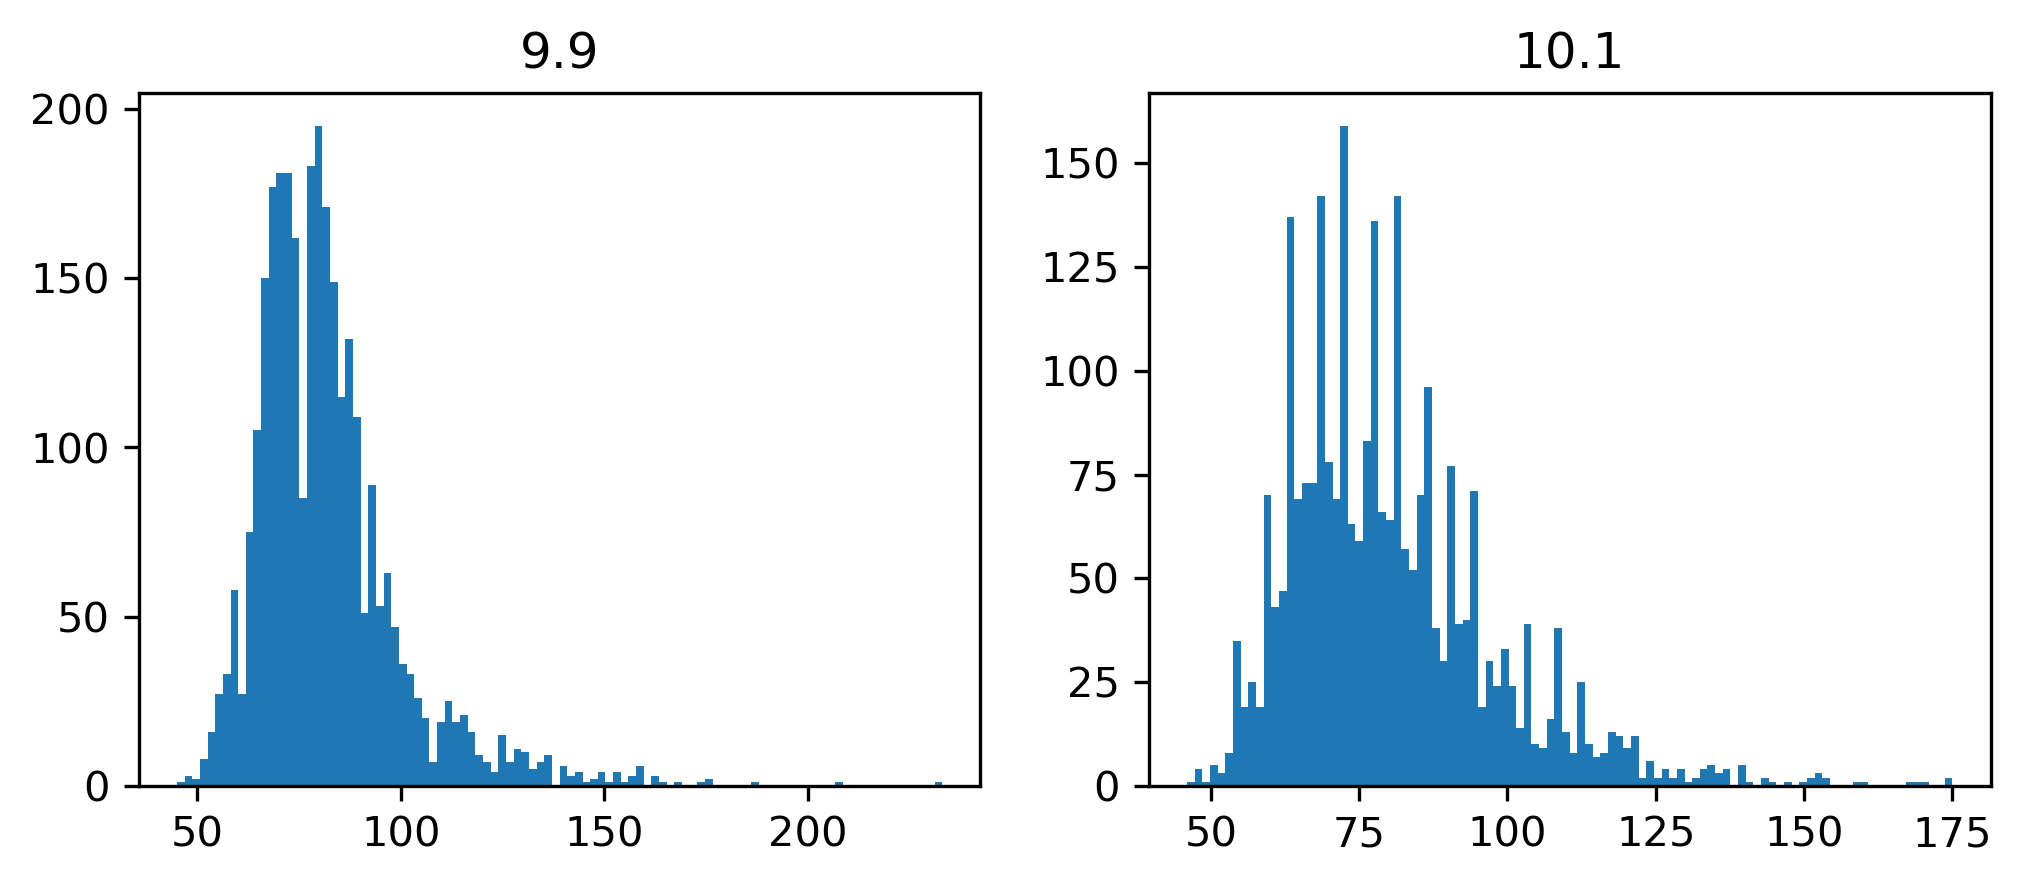

In [441]:
plt.figure(dpi=300,figsize=(21,21))
for i in range(len(file_list)):
    file=file_list[i]
    plt.subplot(6,5,i+1)
    new=information(file)
    plt.title(new.parameter_float_find("{}".format(variable)))
    multiply= np.array(new.field_find("Multiply")).astype(float)
    
    
    within_check = np.array(new.field_find("Multiply")).astype(float)
    multiply= multiply[np.where(within_check>0)[0]]
    
    plt.hist(multiply,bins=100)
plt.savefig("new_voltage_split")
plt.show()

## Within Check

In [442]:
voltage=[]
within_aver=[]
for i in file_list : 
    new= information(i)
    voltage.append(new.parameter_float_find("{}".format(variable)))
    within=np.array(new.field_find("Within")).astype(float)
    within_aver.append(np.mean(within))
print(within_aver)

[1.0, 1.0]


## Example File Histgram

# Analyze main pulse